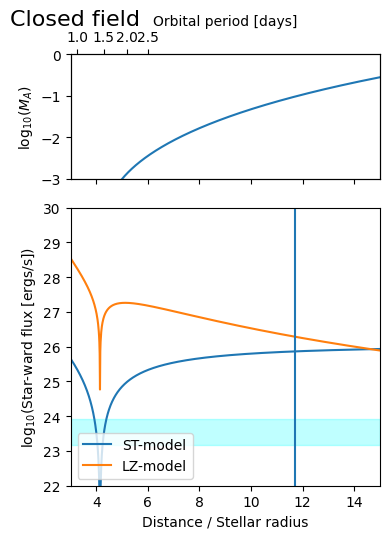

In [17]:
# Sub-Alfvenic flux for dipole field configuration
# All units are cgs unless specified otherwise
#
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import R_jup, R_sun
import astropy.units as u
#
alpha = 1	# Interaction strength of obstacle with flow
B0 = 500.0	# Surface magnetic field in Gauss
Bp0 = 10.0	# PLanetary magnetic field
theta_M = 0.0   #
Omega_star = 2.0*np.pi/(1.42*24*3600)	# Rotation angular velocity of the star
Rp = (0.9*R_jup).to("cm").value 	# Planetary radius in cm
R_star = (1.38*R_sun).to("cm").value	# Radius of the star
M_star_msun = 1.22	# Stellar mass in units of solar mass
n0 = 2e4#2e4	# Plasma density at the plabnet (only used to computed the Alfven speed)
		# Does not enter the energy / flux determination but for that (so plasma temp does not matter)
#
dvec = np.linspace(3.0,15.0,1000)*R_star	# Orbital distance of the planet
B_d = B0*(dvec/R_star)**-3	# B-field at the planet
v_orb = 30e5*(M_star_msun/(dvec/1.5e13))**0.5	# Orbital speed of planet
v_rot = dvec*Omega_star			# Corotation speed
v_rel = np.absolute(v_orb-v_rot)		# Relatve speed between obstacle and flow
v_alf = 2.18e11*B_d*n0**-0.5			# Alfven speed at the planet
M_A = v_rel/v_alf		# Alfven mach number
#
Bp = Bp0 * M_star_msun**0.5/(dvec/1.5e13)**1.5 / 365.
Rp_eff = Rp * (Bp/B_d)**(1./3.) * (3*np.cos(theta_M/2))**0.5
#
Rp_eff = Rp * (Bp/B_d)**(1./3.) * (3*np.cos(theta_M/2))**0.5
Rp_eff[Rp_eff<Rp]=Rp
#
S_mks = 2*np.pi*(Rp_eff/1e2)**2 * (v_alf/1e2) * (alpha*M_A)**2 * (B_d/1e4)**2/(4*np.pi*1e-7)
S = S_mks * 1e7
#
period_marker = np.array([0.25,0.5,1,1.5,2,2.5])
dvec_marker = ((period_marker/365.)*M_star_msun**0.5)**(1./1.5) *1.5e13/R_star
#
tp1 = (np.cos(np.arccos(0.3)-0.3/2) - np.cos(np.arccos(0.3)+0.3/2)) / 2
tp2 = (np.cos(np.arccos(0.7)-0.7/2) - np.cos(np.arccos(0.7)+0.7/2)) / 2
#
bsa_min = min(tp1,tp2)
bsa_max = max(tp1,tp2)
#
pow_min = 2e21/0.01*bsa_min * 2.8e6*B0/(167.-120.)/1e6
pow_max = 2e21/0.1*bsa_max * 2.8e6*B0/(167.-120.)/1e6
#
plt.figure(figsize=(4,5.5))
ax2 = plt.subplot2grid((3,1),(1,0),rowspan=2,colspan=1)
ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1)

ax2.plot(dvec/R_star,np.log10(S),label="ST-model")
ax2.plot(dvec/R_star,np.log10(S/M_A*0.25),label = "LZ-model")
ax2.axvline(11.7)
ax2.fill_between([np.amin(dvec)/R_star,np.amax(dvec)/R_star],[np.log10(pow_min),np.log10(pow_min)],[np.log10(pow_max),np.log10(pow_max)],color="cyan",alpha=0.25)
ax1.plot(dvec/R_star,np.log10(M_A))

ax11 = ax1.twiny()
ax11.set_xticks(dvec_marker)
ax11.set_xticklabels(period_marker)
ax1.tick_params(top=False,which='both')
ax11.tick_params(top=False,which='minor')
ax1.set_xticklabels([])

ax11.set_xlim([np.amin(dvec)/R_star,np.amax(dvec)/R_star])
ax1.set_xlim([np.amin(dvec)/R_star,np.amax(dvec)/R_star])
ax2.set_xlim([np.amin(dvec)/R_star,np.amax(dvec)/R_star])
ax2.set_ylim([22,30])
ax1.set_ylim([-3,0])

ax11.set_xlabel("Orbital period [days]")
ax2.legend(loc=3)
ax2.set_ylabel(r"${\rm log}_{10}$(Star-ward flux [ergs/s])")
ax2.set_xlabel("Distance / Stellar radius")
ax1.set_ylabel(r"${\rm log}_{10}(M_A)$")

# ax2.text(x=8.5,y=24.4,s=r"$B_\ast=100\,{\rm G}$",fontsize=14)
# ax2.text(x=8.5,y=24.0,s=r"$n_0 = 2\times 10^4\,{\rm cm}^{-3}$",fontsize=14)
ax1.text(x=0.65,y=0.7,s="Closed field",fontsize=16)
plt.tight_layout()
# plt.savefig("closed.pdf")
# plt.close()

In [38]:
P = 10**25.8*u.erg/u.s #erg/s
omega = 0.16 #sr
d = 124.7*u.pc # pc
flux = (P / (omega * d**2)).to("erg/s/cm2") 
flux_per_Hz = flux / (2.8e6*2100*.2*u.Hz) 
flux_per_Hz.value * 1e23 * 0.01 #Jansky

0.002264846109763025

In [37]:
2.6 * 500

1300.0